# Base de dados de alunos

* __Key Name__: TPC7

* __Data de início__: 2021-11-22

* __Data de fim__: 2021-11-28

* __Supervisor__: José Carlos Leite Ramalho, https://algoritmi.uminho.pt/user/jose-carlos-leite-ramalho/

* __Autora__: Mariana José Nogueira da Silva Costa, A96284

* __Abstract__: O objetivo deste trabalho é desenvolver funções que permitam aceder a uma base de dados e tirar informações específicas.
Neste caso, as ferramentas criadas permitem carregar um ficheiro com 3 dimensões, a primeira é a base de dados, uma lista que contém toda a informação, a 2ª dimensão é uma lista que corresponde á informação de um único aluno, e a 3ª é uma lista onde está guardada a informação relativa ás notas dos trabalhos de casa do aluno.
As funções criadas de seguida permitem ver a função de uma forma mais organizada, fazer um balanço do número de alunos por curso (com um gráfico para permitir visualizar melhor), aceder ao registo de um aluno específico através do deu id, listar os 10 alunos com melhor média de trabalhos de casa e saber a distribuição de alunos por média (também possível de visualizar num gráfico).


BdAlunos = [Aluno] 
Aluno = [id, nome, curso, [tpc1, tpc2, tpc3, tpc4]]
Campos = ["\"as"\"]


In [4]:
def getAluno(texto):
    textoLimpo = texto.replace("\"","")
    campos = textoLimpo.split(",")
    aluno = []
    aluno.append(campos[0])
    aluno.append(campos[1])
    aluno.append(campos[2])
    aluno.append(campos[3:])
    lista = []
    for s in aluno[3]:
        lista.append(int(s))
    aluno[3] = lista
    return(aluno)

def lerDataset(fnome):
    f = open(fnome, encoding="utf-8")
    bd = []
    f.readline()
    for linha in f:
        bd.append(getAluno(linha))

    return bd


In [5]:
BD = []
BD = lerDataset("alunos.csv")

In [36]:
#def chaveOrd()

def listarDataset(bd):
    #bd.sort(key=chaveOrd)
    print("id     nome     curso     média")
    print("-------------------------------")
    for a in bd:
        print(a[0] + " | " + a[1] + " | " + a[2] + " | " + str(sum(a[3])/4))

listarDataset(BD)

id     nome     curso     média
-------------------------------
a1 | Aysha Melanie Gilberto | LEI | 11.75
a2 | Igor André Cantanhede | ENGFIS | 16.5
a3 | Laurénio Narciso | ENGFIS | 12.75
a4 | Jasnoor Casegas | LCC | 15.5
a5 | Tawseef Rebouças | ENGBIOM | 14.25
a6 | Eryk Clementino | LEI | 13.5
a7 | Ianna Noivo | ENGBIOM | 15.75
a8 | Ayla Thaissa Reina | ENGBIOM | 11.5
a9 | Cássia Viviane Coitã | ENGFIS | 13.0
a10 | Koby Vindima | LEI | 14.0
a11 | Gustavo Martim Hernandez | ENGBIOM | 11.0
a12 | Siddarta Beiriz | LEI | 14.75
a13 | Daniela Patrícia Montes | ENGBIOM | 16.75
a14 | Kaylla Pessego | LCC | 14.0
a15 | Bianca Cristina Primitivo | ENGBIOM | 13.25
a16 | Magna Galhardo | ENGFIS | 15.25
a17 | Grace Isabel Patriarca | LCC | 12.75
a18 | Saubhagya Buco | LEI | 15.25
a19 | Ivo Vicente Boisa | ENGBIOM | 13.75
a20 | Vivaan Castilhos | ENGFIS | 13.0
a21 | Layana Camejo | ENGFIS | 14.75
a22 | Mahdi Menoita | ENGFIS | 12.75
a23 | Yifan Cortinado | LEI | 15.25
a24 | Éder Sodré | ENGFIS | 14

In [7]:
def distribPorCurso(bd):
    distribuicao = {}
    for a in bd:
        if a[2] in distribuicao.keys():
            distribuicao[a[2]] = distribuicao[a[2]] +1
        else:
            distribuicao[a[2]] = 1
    return distribuicao

d= distribPorCurso(BD)
print(d)

{'LEI': 23, 'ENGFIS': 32, 'LCC': 20, 'ENGBIOM': 25}


In [56]:
def consultarDataset(bd):
    id = input("Introduza o ID do aluno que pretende saber informação: ")
    i = 0
    for i in range (len(bd)):
        if bd[i][0] == id:
            print(bd[i][0] + ' | ' + bd[i][1] + '| ' + bd[i][2] + ' | ' + str(sum(bd[i][3])/4))
        else:
            i = i + 1


In [58]:
M = consultarDataset(BD)
print(M)

a1 | Aysha Melanie Gilberto| LEI | 11.75
None


In [51]:
def top10(bd):
    lista10 = []
    for a in bd:
        media = (sum(a[3])/4)
        lista10.append(media)
    for i in range (10):
        maxi = max(lista10)
        ind = lista10.index(maxi)
        aluno = bd[ind]
        print(aluno[0], aluno[1], aluno[2])
        lista10.pop(ind)

In [52]:
top = top10(BD)
print(top)

a47 Moisés João Cornelio LEI
a79 Sadagi Cruto ENGBIOM
a32 Ariane Sofia Foja LEI
a72 Ana Gabriel Quirino LCC
a54 Dânia Lucy Montelobo LEI
a79 Sadagi Cruto ENGBIOM
a13 Daniela Patrícia Montes ENGBIOM
a39 Victória Gabriela Incenso LEI
a42 Kattleya Trigueiro ENGFIS
a2 Igor André Cantanhede ENGFIS
None


In [75]:
def distribPorMedia(bd):
    i = 0
    m = 1
    n = 0
    d = {}
    while m != 21 or i == (len(bd)):
        i = 0
        for i in range (len(bd)):
            a = 0
            a = sum(bd[i][3])/4
            if (m-0.5) <= a <= (m+0.4):
                n = n + 1
            else:
                i = i + 1
        d[m] = n
        m = m + 1
    print(d)


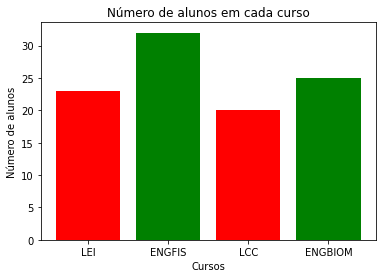

In [74]:
import matplotlib.pyplot as plt
 
# x-coordinates of left sides of bars
left = [1, 2, 3, 4]
 
# heights of bars
height = [23, 32, 20, 25]
 
# labels for bars
tick_label = ['LEI', 'ENGFIS', 'LCC', 'ENGBIOM']
 
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'green'])
 
# naming the x-axis
plt.xlabel('Cursos')
# naming the y-axis
plt.ylabel('Número de alunos')
# plot title
plt.title('Número de alunos em cada curso')
 
# function to show the plot
plt.show()

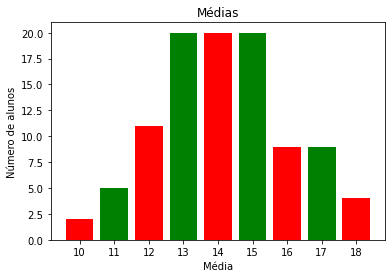

In [76]:
import matplotlib.pyplot as plt
 
# x-coordinates of left sides of bars
left = [1, 2, 3, 4, 5, 6, 7, 8, 9]
 
# heights of bars
height = [2, 5, 11, 20, 20, 20, 9, 9, 4]
 
# labels for bars
tick_label = ['10', '11', '12', '13', '14', '15', '16', '17', '18']
 
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'green'])
 
# naming the x-axis
plt.xlabel('Média')
# naming the y-axis
plt.ylabel('Número de alunos')
# plot title
plt.title('Médias')
 
# function to show the plot
plt.show()